# Unsupervised Learning


## Preprocessing

In [2]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np

# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

# uncomment the followung to load all categories
#categories = None

total_data = fetch_20newsgroups(subset='all', categories=categories,shuffle=False, remove=('headers', 'footers', 'quotes'))

data = pd.DataFrame(total_data['data'], columns=["post"])
label = pd.DataFrame(total_data['target'])

## preprocess the whole text

In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords

"""
def pre_process_text(data):

  # ToDo
  lemmatizer = WordNetLemmatizer()
  for i in range(len(data)):
    word_list = word_tokenize(data)
    lemmatized_doc = ""
    for word in word_list:
      lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
    data[i] = lemmatized_doc 

"""
def pre_process_text(data):

  # ToDo

  # Function to preprocess the post which involves removing URL,
  # removing special characters, numbers, extra spaces, etc

  data = re.sub(r'\S*https?:\S*', '', data)
  data = re.sub('[^A-Za-z]+', ' ', data)

  altered_post_words = []
  for word in data.split():
    if word.lower() not in stopwords.words("english"):
      altered_post_words.append(word)
  
  data = ' '.join(altered_post_words)

  data = data.lower()

  data = data.strip()

  return data

data['preprocessed_post'] = data['post'].apply(lambda x: pre_process_text(x))

In [4]:
display(data)

,post,preprocessed_post
0,\n\nI think I can. Largely as a result of effo...,think largely result efforts people reading gr...
1,"In regards to fractal commpression, I have see...",regards fractal commpression seen fractal comp...
2,Background: The Orion spacedrive was a theoret...,background orion spacedrive theoretical concep...
3,930418\n\nDo what thou wilt shall be the whole...,thou wilt shall whole law honestly word sin re...
4,,
...,...,...
2583,\nI get regular questions about gamma correcti...,get regular questions gamma correction since g...
2584,"\n\nWhen Robert refers to the ""orthodox"", he i...",robert refers orthodox talking historical posi...
2585,Hello there!\n\nA week ago a guy asked what a ...,hello week ago guy asked sco file well researc...
2586,I've been playing with a program called PICLAB...,playing program called piclab modify gif files...


Term Frequency (TF): 

It is the ratio of the occurrence of the word (w) in document (d) per the total number of words in the documents. With this simple formulation, we are measuring the frequency of a word in the document. 

For example, if the sentence has 6 words and contains two “the”, the TF ratio of this word would be (2/6).

Inverse Document Frequency (IDF):

IDF calculates the importance of a word in a corpus D. The most frequently used words like “of, we, are” have little to no significance. It is calculated by dividing the total number of documents in the corpus by the number of documents containing the word.

TF-IDF is the product of term frequency and inverse document frequency. It gives more importance to the word that is rare in the corpus and common in a document.

In create TF-IDF matrix for number of documents, the columns correspond to all the vocabulary that has ever been used with all the documents we have at our disposal and the rowes correspond to each of the document. Then the value at each position corresponds to the tf-idf of a given vocabulary within a given document.
for one ducument, the TF-IDF matrix changes to TF-IDF vector.


Convert text to vector using TfidfVectorizer


In [5]:
# ToDo

# initialize the vectorizer for word importance
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95)

# applying the vectorizer to the preprocessed posts
data = vectorizer.fit_transform(data['preprocessed_post'])
print(data.shape)

(2588, 6484)


## Training


## Kmeans


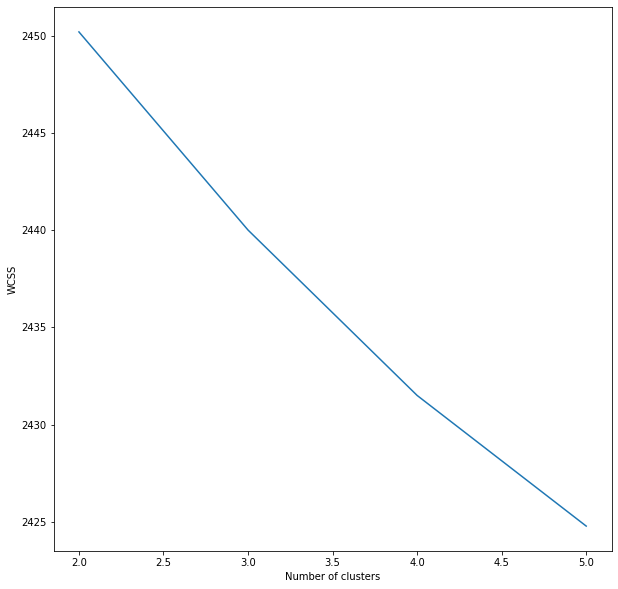

In [6]:
# ToDo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(2,6):
  model = KMeans(n_clusters = i, init = "k-means++")
  model.fit(data)
  wcss.append(model.inertia_)
     

plt.figure(figsize=(10,10))
plt.plot(range(2,6), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



به کمک pca ابعاد داده‌ها را کاهش دهید و با رسم آنها سعی کنید تعداد کلاستر بهینه را بیابید. سعی کنید که حروف برجسته هر دسته را استخراج کنید. به کمک نمایش دوبعدی دادگان و همچنین کلیدواژه‌های هر دسته در تعداد دسته‌های بهینه، آنها را نامگذاری کنید (مساله جواب درست دارد :)).

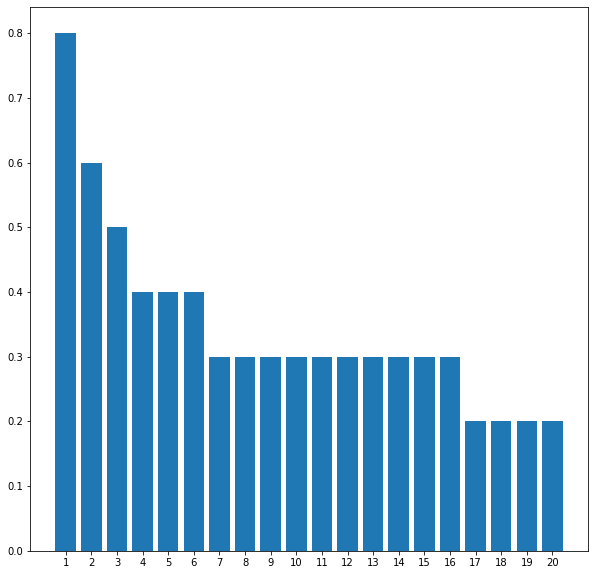

In [9]:
# source for this part: https://github.com/hardikasnani/classifying-and-clustering-the-newsgroups/blob/main/classify-cluster.ipynb

# importing dimensionality reduction helper
from sklearn.decomposition import PCA
# initializing PCA with 2 components
pca = PCA(n_components=20)

# reducing the dimensionality
component_vectors = pca.fit_transform(data.toarray())
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height=var, tick_label=labels)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-----------------The 10 most relevant terms in each cluster------------------------------
Cluster 0: one like would think get know good also could see
Cluster 1: thanks graphics file image files know format anyone would please
Cluster 2: god jesus christian bible people one christians believe would christ
Cluster 3: space would nasa shuttle launch orbit moon think like earth
------------------------------------------------------------------------------------------


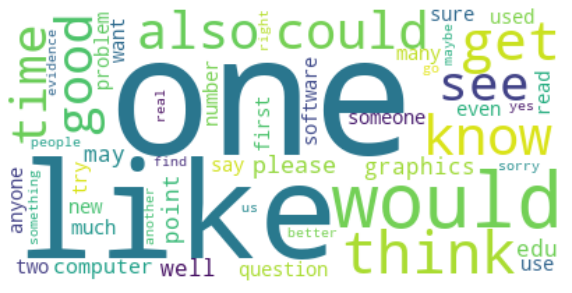

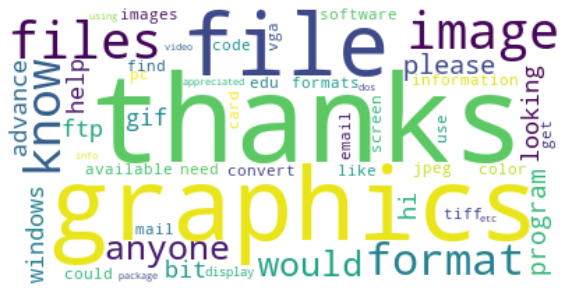

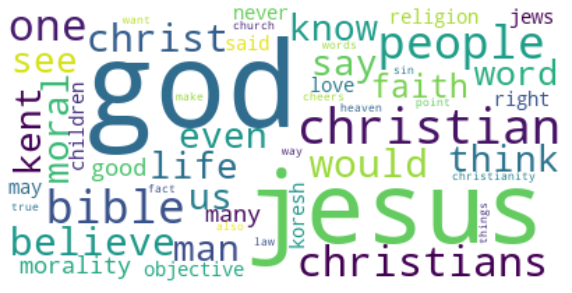

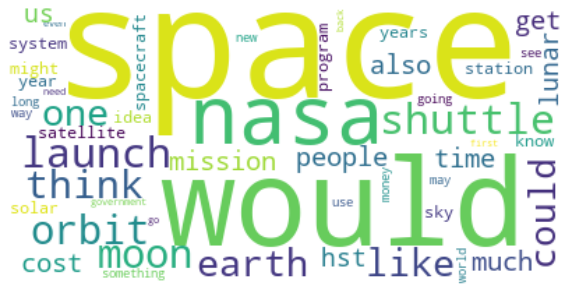

In [23]:
# source of this part: https://www.kaggle.com/code/aybukehamideak/clustering-text-documents-using-k-means

from wordcloud import WordCloud

# based on two previous plots, k=4 is the elbow point for k means algorithm and also has a suitably explained variance.
true_k = 4
km = KMeans(n_clusters=true_k, init="k-means++")
label = km.fit_predict(data)



centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
print("-----------------The 10 most relevant terms in each cluster------------------------------")
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()
print("------------------------------------------------------------------------------------------")
def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies):
    plt.figure(figsize=(10,10))
    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()